In [2]:
# import packages
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import sklearn.neighbors
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import numpy as np


#lemmatization libraries 
import nltk.stem
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# punctuation + stop words libraries:
from nltk.corpus import stopwords
import re, string, timeit

#stemming 
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ophir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ophir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ophir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1(a) Parsing the txt files:

## Question 1(a): Parsing Yelp, IMDB, and Amazon database:

#### Parsing Yelp

In [3]:
df_yelp = pd.read_csv("yelp_labelled.txt", sep="\t", header=None, names=["sentence", "label"])

How many values are there? How many positive and negative emotions (0/1)?

In [4]:
df_yelp.label.value_counts()

1    500
0    500
Name: label, dtype: int64

#### Parsing IMDB

In [5]:
df_imdb = pd.read_csv("imdb_labelled.txt", sep=" \t", header=None, names=["sentence", "label"])
#Notice: IMDB required another space in order to parse the 1000 lines because it was badly formatted

<ipython-input-5-0a2494051e90>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_imdb = pd.read_csv("imdb_labelled.txt", sep=" \t", header=None, names=["sentence", "label"])


How many values are there? How many positive and negative emotions (0/1)?

In [6]:
df_imdb.label.value_counts()

1    500
0    500
Name: label, dtype: int64

#### Parsing Amazon 

In [7]:
df_amazon = pd.read_csv("amazon_cells_labelled.txt", sep="\t", header=None, names=["sentence", "label"])

How many values are there? How many positive and negative emotions (0/1)?

In [8]:
df_amazon.label.value_counts()

1    500
0    500
Name: label, dtype: int64

#### Results - Amazon, IMDB and Yelp are balanced (50% negative 50% positive)
    

## Question 2(b): Preprocessing

Pick your preprocessing strategy. Since these sentences are online reviews, they may contain significant amounts of noise and garbage. You may or may not want to do one or all of
the following.

• Lowercase all of the words.

• Lemmatization of all the words (i.e., convert every word to its root so that all of “running,”
“run,” and “runs” are converted to “run” and and all of “good,” “well,” “better,” and “best”
are converted to “good”; this is easily done using nltk.stem).

• Strip punctuation.

• Strip the stop words, e.g., “the”, “and”, “or”.

• Something else? Tell us about it.

#### Lowercase all databases

In [9]:
df_yelp["sentence"] = df_yelp["sentence"].str.lower()
df_imdb["sentence"] = df_imdb["sentence"].str.lower()
df_amazon["sentence"] = df_amazon["sentence"].str.lower()

#### Strip the stop words, e.g., “the”, “and”, “or”

In [10]:
stop = stopwords.words('english')
stop.remove("not")
stop.remove("nor")
# stop = text.ENGLISH_STOP_WORDS

In [11]:
df_yelp['sentence'] = df_yelp['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_imdb['sentence'] = df_imdb['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_amazon['sentence'] = df_amazon['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#### Punctuation Strip

In [12]:
#function that removes punctuation:
def remove_punctuation(sentence):
    sentence = re.sub(r'[^\w\s+]','',sentence)
    return(sentence)

In [13]:
df_yelp["sentence"] = df_yelp['sentence'].apply(lambda x: remove_punctuation(x))
df_imdb["sentence"] = df_imdb['sentence'].apply(lambda x: remove_punctuation(x))
df_amazon["sentence"] = df_amazon['sentence'].apply(lambda x: remove_punctuation(x))

#### Lemmatization

In [14]:
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() 
lemmatizer = nltk.stem.WordNetLemmatizer()

In [15]:
def lemmatize_text(text):
    list2 = word_tokenizer.tokenize(text)
    lemmatized_sentence = ' '.join([lemmatizer.lemmatize(words) for words in list2])
    return(lemmatized_sentence)

In [16]:
df_yelp['sentence'] = df_yelp['sentence'].apply(lambda x: lemmatize_text(x))
df_imdb['sentence'] = df_imdb['sentence'].apply(lambda x: lemmatize_text(x))
df_amazon['sentence'] = df_amazon['sentence'].apply(lambda x: lemmatize_text(x))

## 2(C): Split training and test data

For each file use the first 400 instances for each label as the training set and the remaining 100 instances as testing set.

In total, there are 2400 reviews for training and 600 reviews for testing.

#### Yelp - Divide to positive and negative data set and extract from there the train / test datasets:

In [17]:
# Divide into positive / negative datasets:
df_yelp_pos = df_yelp[df_yelp['label'] == 1].reset_index(drop=True)   # positive emotion = 1
df_yelp_neg = df_yelp[df_yelp['label'] == 0].reset_index(drop=True)   # Negative emotion = 0

# For the positive dataset - divide into train / test datasets:
df_yelp_train_pos = df_yelp_pos[:400]
df_yelp_test_pos = df_yelp_pos[400:500]

# For the negative dataset - divide into train / test datasets:
df_yelp_train_neg = df_yelp_neg[:400]
df_yelp_test_neg = df_yelp_neg[400:500]

#### IMDB - Divide to positive and negative data set and extract from there the train / test datasets:

In [18]:
# Divide into positive / negative datasets:
df_imdb_pos = df_imdb[df_imdb['label'] == 1].reset_index(drop=True)   # positive emotion = 1
df_imdb_neg = df_imdb[df_imdb['label'] == 0].reset_index(drop=True)   # Negative emotion = 0

# For positive - train / test datasets:
df_imdb_train_pos = df_imdb_pos[:400]
df_imdb_test_pos = df_imdb_pos[400:500]

# For the negative dataset - divide into train / test datasets:
df_imdb_train_neg = df_imdb_neg[:400]
df_imdb_test_neg = df_imdb_neg[400:500]

#### Amazon - Divide to positive and negative data set and extract from there the train / test datasets:

In [19]:
# Divide into positive / negative datasets:
df_amazon_pos = df_amazon[df_amazon['label'] == 1].reset_index(drop=True)   # positive emotion = 1
df_amazon_neg = df_amazon[df_amazon['label'] == 0].reset_index(drop=True)   # Negative emotion = 0

# For positive - train / test datasets:
df_amazon_train_pos = df_amazon_pos[:400]
df_amazon_test_pos = df_amazon_pos[400:500]

# For the negative dataset - divide into train / test datasets:
df_amazon_train_neg = df_amazon_neg[:400]
df_amazon_test_neg = df_amazon_neg[400:500]

### Concat - train_df & test_df:

In [20]:
df_train = pd.concat([df_amazon_train_pos, df_amazon_train_neg, df_yelp_train_pos, df_yelp_train_neg,
                                   df_imdb_train_pos, df_imdb_train_neg], ignore_index=True)

#self check
len(df_train)

2400

In [21]:
df_test = pd.concat([df_amazon_test_pos, df_amazon_test_neg, df_yelp_test_pos, df_yelp_test_neg,
                                   df_yelp_test_pos, df_yelp_test_neg], ignore_index=True)

#self check
len(df_test)

600

### Shuffle

In [22]:
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [23]:
# For 2(h)
df_train_ngram = df_train.copy()
df_test_ngram = df_test.copy()

## Question 2(d)

Bag of Words model.

Extract features and then represent each review using bag of words model, i.e., every word in the review becomes its own element in a feature vector. 
In order to do this, first, make one pass through all the reviews in the training set (Explain why we can’t
use testing set at this point) and build a dictionary of unique words. 
Then, make another pass through the review in both the training set and testing set and count up the occurrences of
each word in your dictionary. 
The i-th element of a review’s feature vector is the number of occurrences of the ith dictionary word in the review. 
Implement the bag of words model and report feature vectors of any two reviews in the training set. 


#### Create a dictionary with all unique words:

In [24]:
# Dictionary with all unique words and their count:
word_freq = dict()
for row in df_train['sentence']:
    for word in row.split():
        if word not in word_freq:
            word_freq[word] = 0

In [26]:
# word_freq

In [27]:
#count values
for row in df_train['sentence']:
    for word in row.split():
        word_freq[word] = word_freq[word] + 1
for row in df_test['sentence']:
    for word in row.split():
        if word in word_freq:
            word_freq[word] = word_freq[word] + 1

In [177]:
print(word_freq)

{'not': 304, 'mention': 6, 'combination': 3, 'pear': 1, 'almond': 1, 'bacon': 6, 'big': 19, 'winner': 2, 'patio': 3, 'seating': 5, 'comfortable': 20, 'friend': 11, 'pasta': 6, 'also': 77, 'bad': 89, 'barely': 13, 'touched': 1, 'it': 118, 'say': 44, 'food': 147, 'amazing': 31, 'arrives': 1, 'meh': 2, 'sorry': 2, 'made': 56, 'purchase': 15, 'main': 4, 'player': 8, 'mesmerising': 1, 'damian': 1, 'talented': 3, 'versatile': 1, 'many': 29, 'way': 44, 'writing': 12, 'portraying': 2, 'different': 13, 'character': 42, 'screen': 19, 'wanted': 11, 'price': 47, 'think': 47, 'place': 149, 'would': 90, 'much': 51, 'rather': 12, 'gone': 5, 'several': 12, 'time': 128, 'past': 3, 'experience': 38, 'always': 28, 'great': 217, 'ursula': 1, 'burton': 1, 'portrayal': 4, 'nun': 2, 'touching': 2, 'funny': 17, 'making': 5, 'fun': 8, 'church': 2, 'fresh': 20, 'subtle': 4, 'sublime': 2, 'effect': 9, 'taste': 14, 'mom': 3, 'multigrain': 1, 'pumpkin': 1, 'pancake': 3, 'pecan': 1, 'butter': 4, 'fluffy': 1, 'delic

In [28]:
# narrow_dict = word_freq.copy()
# for k, v in word_freq.items():
#      if v < 3:
#             del narrow_dict[k]
# len(narrow_dict)

In [30]:
def feature_vector_func(sentence):
    feature_vector = {x:0 for x in word_freq} # Put 0-s instead of counting every unique word
    word_list = sentence.split()
    for word in feature_vector:
        if word in word_list:
            feature_vector[word] = feature_vector[word] + 1
        else:
            feature_vector[word] = feature_vector[word]
    return(feature_vector)

#### Applying the function to all rows in df_train to get all feature vectors:

In [31]:
df_train['feature_vector_dict'] = df_train['sentence'].apply(lambda x: feature_vector_func(x))

In [32]:
df_train.head()

,sentence,label,feature_vector_dict
0,not mention combination pear almond bacon big ...,1,"{'not': 1, 'mention': 1, 'combination': 1, 'pe..."
1,patio seating comfortable,1,"{'not': 0, 'mention': 0, 'combination': 0, 'pe..."
2,friend pasta also bad barely touched it,0,"{'not': 0, 'mention': 0, 'combination': 0, 'pe..."
3,say food amazing,1,"{'not': 0, 'mention': 0, 'combination': 0, 'pe..."
4,food arrives meh,0,"{'not': 0, 'mention': 0, 'combination': 0, 'pe..."


In [37]:
# print(df_train['feature_vector_dict'][0])

#### Applying the function to all rows in the same manner for df_test:

In [33]:
df_test['feature_vector_dict'] = df_test['sentence'].apply(lambda x: feature_vector_func(x))

In [34]:
df_test.head()

,sentence,label,feature_vector_dict
0,place nice surprise,1,"{'not': 0, 'mention': 0, 'combination': 0, 'pe..."
1,really impressive place closed down,0,"{'not': 0, 'mention': 0, 'combination': 0, 'pe..."
2,great food awesome service,1,"{'not': 0, 'mention': 0, 'combination': 0, 'pe..."
3,said abovepretty useless,0,"{'not': 0, 'mention': 0, 'combination': 0, 'pe..."
4,good case,1,"{'not': 0, 'mention': 0, 'combination': 0, 'pe..."


In [40]:
# print(df_train['feature_vector_dict'][0])

#### Compare any two feature vectors of any two reviews in the training set:

In [38]:
df_train['feature_vector_dict'][:2]

0    {'not': 1, 'mention': 1, 'combination': 1, 'pe...
1    {'not': 0, 'mention': 0, 'combination': 0, 'pe...
Name: feature_vector_dict, dtype: object

## Question 2(e) - Pick your postprocessing strategy

#### We chose to use the 4th method - standardize the data by subtracting the mean and dividing by the variance.

Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. 

However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. 

So, even if you have outliers in your data, they will not be affected by standardization.

In [41]:
#Function that converts the dict "feature_vector" into an array:
def dict_to_array(vector):
    data = list(vector.values())
    an_array = np.array(data)
    return(an_array)

In [176]:
# self check
# data = list(df_train['feature_vector'][1].values())
# an_array = np.array(data)
# print(an_array)

In [43]:
df_train['feature_vector_array'] = df_train['feature_vector_dict'].apply(lambda x: dict_to_array(x))

In [46]:
df_train['feature_vector_array'][0]

array([1, 1, 1, ..., 0, 0, 0])

In [47]:
#function that gets "df_train['array_vector'][i]", and returns the standardized array:

import itertools
scaler = StandardScaler()

def standard(row):
    standardized_array = scaler.fit_transform(np.array(row).reshape(-1,1))
    return(standardized_array)

In [48]:
df_train['standard_array'] = df_train['feature_vector_array'].apply(lambda x: standard(x))

In [54]:
#self check 
df_train['standard_array'][0]

array([[23.21098878],
       [23.21098878],
       [23.21098878],
       ...,
       [-0.04308304],
       [-0.04308304],
       [-0.04308304]])

In [55]:
df_train.head()

,sentence,label,feature_vector_dict,feature_vector_array,standard_array
0,not mention combination pear almond bacon big ...,1,"{'not': 1, 'mention': 1, 'combination': 1, 'pe...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[[23.210988776870316], [23.210988776870316], [..."
1,patio seating comfortable,1,"{'not': 0, 'mention': 0, 'combination': 0, 'pe...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, ...","[[-0.026367577267139772], [-0.0263675772671397..."
2,friend pasta also bad barely touched it,0,"{'not': 0, 'mention': 0, 'combination': 0, 'pe...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[[-0.040295820993189777], [-0.0402958209931897..."
3,say food amazing,1,"{'not': 0, 'mention': 0, 'combination': 0, 'pe...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[-0.026367577267139772], [-0.0263675772671397..."
4,food arrives meh,0,"{'not': 0, 'mention': 0, 'combination': 0, 'pe...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[-0.026367577267139772], [-0.0263675772671397..."


### For the test data:

In [56]:
df_test['feature_vector_array'] = df_test['feature_vector_dict'].apply(lambda x: dict_to_array(x))
df_test['standard_array'] = df_test['feature_vector_array'].apply(lambda x: standard(x))

## Question 2(f) - Sentiment Prediction

Train a naive Bayes model on the training set and test on the testing set. 

Report the classification accuracy and confusion matrix.

In [58]:
# Rearranging the data for the Naive Bayes prediction:
def array_of_arrays(row):
    list_standard = []
    for i in range(0, len(row)):
        list_standard.append((row[i][0]))
    return (np.array(list_standard))

In [59]:
df_train['standard_array_clean'] = df_train['standard_array'].apply(lambda x: array_of_arrays(x))
df_test['standard_array_clean'] = df_test['standard_array'].apply(lambda x: array_of_arrays(x))

In [60]:
train_X = df_train["standard_array_clean"]
test_X = df_test["standard_array_clean"]

In [61]:
train_X = pd.DataFrame(train_X.to_list()).to_numpy()
test_X = pd.DataFrame(test_X.to_list()).to_numpy()

In [62]:
#Check that there is no "Nan" values:

for array in test_X:
    array_sum = np.sum(array)
    array_has_nan = np.isnan(array_sum)
print(array_has_nan)

False


In [63]:
train_Y = df_train['label']
test_Y = df_test['label']

In [64]:
n = train_X.shape[0] #number of rows
d = train_X.shape[1] #number of unique words = features in feature vector
K = 2 #number of classes - label 1 or label 0

psis = np.zeros([K,d])
phis = np.zeros([K])

In [65]:
for k in range(K):
    X_k = train_X[train_Y == k]
    phis[k] = X_k.shape[0] / float(n)
    psis[k] = np.mean(X_k, axis=0)

In [66]:
# print(psis.shape, phis.shape, train_X.shape)

In [67]:
# implement this in numpy
def nb_predictions(x, psis, phis):
    # adjust shapes
    n , d = x.shape
    x = np.reshape(x, (1,n,d))
    psis = np.reshape(psis, (K, 1, d))
    
    psis = psis.clip(1e-14, 1-1e-14) 
    
    # compute log-probabilities
    logpy = np.log(phis).reshape(K,1)
    logpxy = x * np.log(psis) + (1-x) * np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy

    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])

### Naive Bayes on the Training Dataset

In [68]:
predicted_train, logpyx = nb_predictions(train_X, psis, phis)
# len(predicted_train), len(logpyx), predicted_train.shape, logpyx.shape

### Accuracy Calculation:

In [69]:
(predicted_train == train_Y).mean()

0.8779166666666667

### Naive Bayes on the Test Dataset

In [70]:
predicted_test, logpyx_test = nb_predictions(test_X, psis, phis)

### Accuracy for test data:

In [72]:
(predicted_test == test_Y).mean()

0.7533333333333333

### Confusion matrix:

In [73]:
actual = test_Y
predictions = predicted_test

In [74]:
actual.shape

(600,)

In [75]:
predictions.shape

(600,)

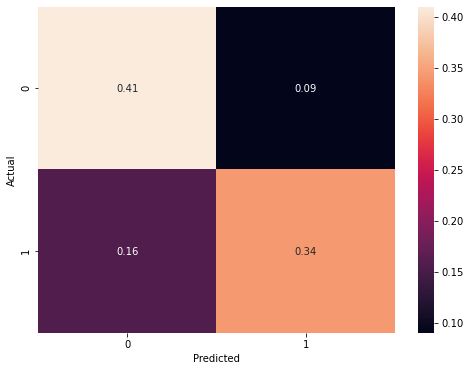

In [77]:
# get actual and create heatmap 
confusion_matrix = pd.crosstab(actual, predictions , rownames=['Actual'], colnames=['Predicted'], normalize=True)
plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True)

## Question 2(g): Logistic Regression

### Part 1: Ridge Regression

In [80]:
unique_words_list = list(word_freq.keys())

In [81]:
train_X_feat_vect = pd.DataFrame(df_train['feature_vector_array'].to_list())
train_X_feat_vect.columns = list(word_freq.keys())
test_X_feat_vect = pd.DataFrame(df_test['feature_vector_array'].to_list())
test_X_feat_vect.columns = list(word_freq.keys())

In [82]:
model_ridge = LogisticRegressionCV(cv=10, penalty='l2', solver='liblinear').fit(train_X_feat_vect, train_Y)

In [181]:
predicted_ridge_test = model_ridge.predict(test_X_feat_vect)
predicted_ridge_test

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,

In [180]:
model_ridge.score(test_X_feat_vect, test_Y)

0.8333333333333334

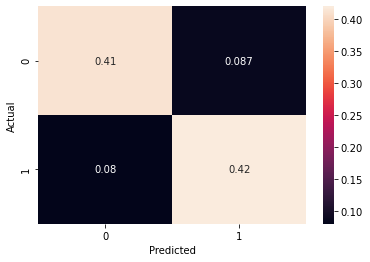

In [183]:
# get actual and create heatmap 
actual = test_Y
predictions_ridge = predicted_ridge_test
confusion_matrix = pd.crosstab(actual, predictions_ridge , rownames=['Actual'], colnames=['Predicted'], normalize=True)
plt.subplots(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True)

#### Most and least important words for the ridge resgression:

In [85]:
model_ridge.coef_
coeffs_ridge = list(np.argsort(model_ridge.coef_))

In [86]:
# most important words:
most_important = coeffs_ridge[0][::-1]
for i in range(0,10):
    print(unique_words_list[most_important[i]])

great
love
delicious
excellent
fantastic
nice
awesome
loved
happier
liked


In [87]:
least_important = coeffs_ridge[0]
for i in range(0,10):
    print(unique_words_list[least_important[i]])

poor
bad
disappointment
not
worst
average
slow
awful
terrible
disappointing


### Part 2: Lasso

In [88]:
model_lasso = LogisticRegressionCV(cv=10, penalty='l1', solver='liblinear').fit(train_X_feat_vect, train_Y)

C:\Users\ophir\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\ophir\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [184]:
predict_lasso = model_lasso.predict(test_X_feat_vect)
predict_lasso

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [90]:
model_lasso.score(test_X_feat_vect, test_Y)

0.84

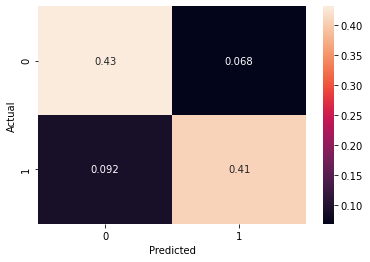

In [185]:
actual = test_Y
predictions_lasso = predict_lasso
confusion_matrix = pd.crosstab(actual, predictions_lasso , rownames=['Actual'], colnames=['Predicted'], normalize=True)
plt.subplots(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True)

In [92]:
model_lasso.coef_
coeffs_lasso = list(np.argsort(model_lasso.coef_))

In [93]:
# most important words:
most_important = coeffs_lasso[0][::-1]
for i in range(0,10):
    print(unique_words_list[most_important[i]])

15
happier
distracting
recommendation
played
great
child
delicious
loved
beautiful


In [94]:
least_important = coeffs_lasso[0]
for i in range(0,10):
    print(unique_words_list[least_important[i]])

flavorless
rude
methe
break
poor
failed
disappointment
waited
unfortunately
slow


## Question 2(h)

#### Build a dictionary of n-gram (n=2):

In [95]:
df_test_ngram

,sentence,label
0,place nice surprise,1
1,really impressive place closed down,0
2,great food awesome service,1
3,said abovepretty useless,0
4,good case,1
...,...,...
595,seriously killer hot chai latte,1
596,service thought good,1
597,not answer call unit never worked once,0
598,rave review wait eat herewhat disappointment,0


In [96]:
# create a list of all two consecutive words in all rows in the dataframe: 
list_consecutive = []
for row in range(0, len(df_train['sentence'])):
    sentence = df_train['sentence'][row]
    word_list = df_train['sentence'][row].split()
    i=0
    while i < len(word_list)-1:
        if (word_list[i] + ' ' + word_list[i+1]) not in list_consecutive:
            list_consecutive.append(word_list[i]+ ' ' + word_list[i+1])
            i+=1
        else:
            i+=1

In [97]:
# len(list_consecutive) #self-check

In [98]:
#make list of consecutive into a dictionary
ngram_dict = dict.fromkeys(list_consecutive, 0)

### Repeat 2(d):

In [99]:
#function that return the two consecutive for every row in the dataframe:
def consecutive(sentence):
    list_cons_per_row = []
    word_list = sentence.split()
    i=0
    while i < len(word_list)-1:
        if (word_list[i] + ' ' + word_list[i+1]) not in list_cons_per_row:
            list_cons_per_row.append(word_list[i]+ ' ' + word_list[i+1])
            i+=1
        else:
            i+=1
    return(list_cons_per_row)

In [100]:
# word_list_3 = consecutive(df_train['sentence'][3])

In [101]:
# for word in word_list_3:
#     print(word)

In [102]:
# ngram_dict['punishment park']

In [105]:
# print(ngram_dict)

In [106]:
len(word_freq)

4318

In [107]:
len(ngram_dict)

11751

In [111]:
def feature_vector_func_ngram(sentence):
    feature_vector_row = dict.fromkeys(ngram_dict, 0)
    word_list = consecutive(sentence)
    for word in word_list:
        if word in ngram_dict:
            feature_vector_row[word] = feature_vector_row[word] + 1
        else:
            pass
    return(feature_vector_row)

In [112]:
df_train_ngram['feature_vector_dict_ngram'] = df_train_ngram['sentence'].apply(lambda x: feature_vector_func_ngram(x))

In [116]:
df_train_ngram.head()

,sentence,label,feature_vector_dict_ngram
0,not mention combination pear almond bacon big ...,1,"{'not mention': 1, 'mention combination': 1, '..."
1,patio seating comfortable,1,"{'not mention': 0, 'mention combination': 0, '..."
2,friend pasta also bad barely touched it,0,"{'not mention': 0, 'mention combination': 0, '..."
3,say food amazing,1,"{'not mention': 0, 'mention combination': 0, '..."
4,food arrives meh,0,"{'not mention': 0, 'mention combination': 0, '..."


#### Applying the function to all rows in the same manner for df_test:

In [114]:
df_test_ngram['feature_vector_dict_ngram'] = df_test_ngram['sentence'].apply(lambda x: feature_vector_func_ngram(x))

In [115]:
df_test_ngram.head()

,sentence,label,feature_vector_dict_ngram
0,place nice surprise,1,"{'not mention': 0, 'mention combination': 0, '..."
1,really impressive place closed down,0,"{'not mention': 0, 'mention combination': 0, '..."
2,great food awesome service,1,"{'not mention': 0, 'mention combination': 0, '..."
3,said abovepretty useless,0,"{'not mention': 0, 'mention combination': 0, '..."
4,good case,1,"{'not mention': 0, 'mention combination': 0, '..."


#### Compare any two feature vectors of any two reviews in the training set:

In [117]:
df_train_ngram['feature_vector_dict_ngram'][:2]

0    {'not mention': 1, 'mention combination': 1, '...
1    {'not mention': 0, 'mention combination': 0, '...
Name: feature_vector_dict_ngram, dtype: object

### Repeat 2(e) - Postprocessing Strategy with ngram

#### For the train data:

In [118]:
df_train_ngram['feature_vector_array_ngram'] = df_train_ngram['feature_vector_dict_ngram'].apply(lambda x: dict_to_array(x))

In [119]:
df_train_ngram.head()

,sentence,label,feature_vector_dict_ngram,feature_vector_array_ngram
0,not mention combination pear almond bacon big ...,1,"{'not mention': 1, 'mention combination': 1, '...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,patio seating comfortable,1,"{'not mention': 0, 'mention combination': 0, '...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ..."
2,friend pasta also bad barely touched it,0,"{'not mention': 0, 'mention combination': 0, '...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ..."
3,say food amazing,1,"{'not mention': 0, 'mention combination': 0, '...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,food arrives meh,0,"{'not mention': 0, 'mention combination': 0, '...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [120]:
df_train_ngram['standard_array_ngram'] = df_train_ngram['feature_vector_array_ngram'].apply(lambda x: standard(x))

#### For the test data:

In [121]:
df_test_ngram['feature_vector_array_ngram'] = df_test_ngram['feature_vector_dict_ngram'].apply(lambda x: dict_to_array(x))
df_test_ngram['standard_array_ngram'] = df_test_ngram['feature_vector_array_ngram'].apply(lambda x: standard(x))

In [122]:
len(df_test_ngram['standard_array_ngram'][0])

11751

### Reapeat 2(f) - Sentiment Prediction

Train a naive Bayes model on the training set and test on the testing set. 

Report the classification accuracy and confusion matrix.

In [123]:
df_train_ngram['standard_array_clean_ngram'] = df_train_ngram['standard_array_ngram'].apply(lambda x: array_of_arrays(x))
df_test_ngram['standard_array_clean_ngram'] = df_test_ngram['standard_array_ngram'].apply(lambda x: array_of_arrays(x))

In [124]:
len(df_test_ngram['standard_array_clean_ngram'][0])

11751

In [125]:
train_X_ngram = df_train_ngram["standard_array_clean_ngram"]
test_X_ngram = df_test_ngram["standard_array_clean_ngram"]

In [126]:
#Check that there is no "Nan" values:
for array in test_X_ngram:
    array_sum = np.sum(array)
    array_has_nan = np.isnan(array_sum)
print(array_has_nan)

False


In [127]:
#False = no "Nan" values!

In [128]:
train_X_ngram = pd.DataFrame(train_X_ngram.to_list())
# train_X_ngram = train_X_ngram.loc[:, :3753]

In [129]:
#Check again - no "Nan" values
for array in test_X_ngram:
    array_sum = np.sum(array)
    array_has_nan = np.isnan(array_sum)
print(array_has_nan)

False


In [130]:
train_X_ngram = train_X_ngram.to_numpy()

In [131]:
train_X_ngram.shape[1] #works well

11751

In [132]:
test_X_ngram = pd.DataFrame(test_X_ngram.to_list())
test_X_ngram #I see there is redundant data - drop all columns after 3756

,0,1,2,3,4,5,6,7,8,9,...,11741,11742,11743,11744,11745,11746,11747,11748,11749,11750
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,...,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,...,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
596,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,...,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225
597,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,...,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225
598,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [133]:
#dropping redundant columns
test_X_ngram   #= test_X_ngram.loc[:, :3755]

,0,1,2,3,4,5,6,7,8,9,...,11741,11742,11743,11744,11745,11746,11747,11748,11749,11750
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,...,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047,-0.013047
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,...,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
596,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,...,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225
597,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,...,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225,-0.009225
598,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [134]:
#check there is no "Nan" values
for array in test_X_ngram:
    array_sum = np.sum(array)
    array_has_nan = np.isnan(array_sum)
print(array_has_nan)

False


In [135]:
#False - we can continue:
test_X_ngram = test_X_ngram.to_numpy()

In [136]:
test_X_ngram.shape

(600, 11751)

In [137]:
train_Y_ngram = df_train['label']
test_Y_ngram = df_test['label']

In [138]:
n = train_X_ngram.shape[0] #number of rows
d = train_X_ngram.shape[1] #number of unique words = features in feature vector
K = 2 #number of classes - label 1 or label 0

psis = np.zeros([K,d])
phis = np.zeros([K])

In [139]:
for k in range(K):
    X_k_ngram = train_X_ngram[train_Y_ngram == k]
    phis[k] = X_k_ngram.shape[0] / float(n)
    psis[k] = np.mean(X_k_ngram, axis=0) #build a function with the mean for label 0 and mean for label 0 as an array

In [140]:
print(psis.shape, phis.shape, train_X_ngram.shape)

(2, 11751) (2,) (2400, 11751)


In [141]:
# implement this in numpy
def nb_predictions(x, psis, phis):
    """This returns class assignments and scores under the NB model.
    
    We compute \arg\max_y p(y|x) as \arg\max_y p(x|y)p(y)
    """
    # adjust shapes
    n , d = x.shape
    x = np.reshape(x, (1,n,d))
    psis = np.reshape(psis, (K, 1, d))
    
    # clip probabilities to avoid log(0)
    psis = psis.clip(1e-14, 1-1e-14) #understand
    
    # compute log-probabilities
    logpy = np.log(phis).reshape(K,1)
    logpxy = x * np.log(psis) + (1-x) * np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy

    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])

### Naive Bayes on the Training Dataset

In [142]:
predicted_train_ngram, logpyx_ngram = nb_predictions(train_X_ngram, psis, phis)

In [143]:
# for i in predicted_train_ngram:
#     if i != 0:
#         print(i)

### Accuracy Calculation:

In [144]:
(predicted_train_ngram == train_Y_ngram).mean()

0.9883333333333333

### Naive Bayes on the Test Dataset

In [145]:
predicted_test_ngram, logpyx_test = nb_predictions(test_X_ngram, psis, phis)

### Accuracy for test data:

In [146]:
(predicted_test_ngram == test_Y_ngram).mean()

0.6633333333333333

### Confusion matrix:

In [147]:
actual_ngram = test_Y_ngram
predictions_ngram = predicted_test_ngram

In [148]:
actual_ngram.shape

(600,)

In [149]:
predictions_ngram.shape

(600,)

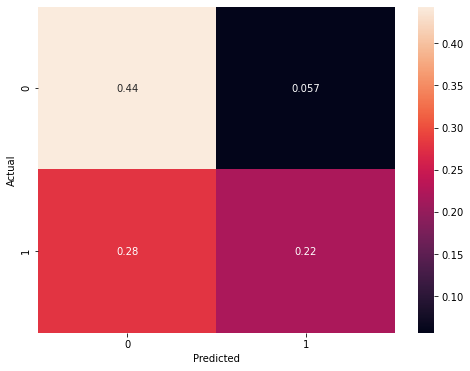

In [151]:
# get actual and create heatmap 
confusion_matrix_ngram = pd.crosstab(actual_ngram, predictions_ngram , rownames=['Actual'], colnames=['Predicted'], normalize=True)
plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix_ngram, annot=True)

### Repeat 2(g): Logistic Regression

#### Part 1: Ridge Regression

In [152]:
train_X_feat_vect_ngram = pd.DataFrame(df_train_ngram['feature_vector_array_ngram'].to_list())
train_X_feat_vect_ngram.columns = list(ngram_dict.keys())
test_X_feat_vect_ngram = pd.DataFrame(df_test_ngram['feature_vector_array_ngram'].to_list())
# test_X_feat_vect_ngram = test_X_feat_vect_ngram.loc[:, :3755]
test_X_feat_vect_ngram.columns = list(ngram_dict.keys())

In [153]:
model_ridge_ngram = LogisticRegressionCV(cv=10, penalty='l2', solver='liblinear').fit(train_X_feat_vect_ngram, train_Y_ngram)

In [162]:
predicted_test_ridge = model_ridge_ngram.predict(test_X_feat_vect_ngram)
predicted_test_ridge

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [163]:
model_ridge_ngram.score(test_X_feat_vect_ngram, test_Y_ngram)

0.6516666666666666

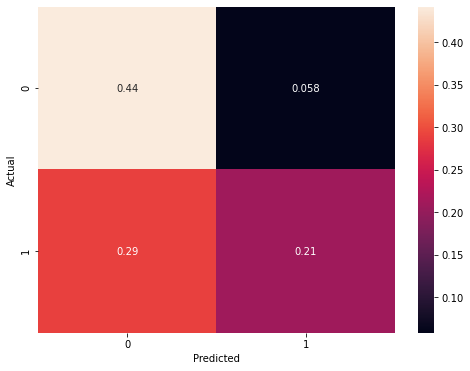

In [164]:
# get actual and create heatmap 
actual_ngram = test_Y_ngram
predictions_ridge_ngram = predicted_test_ridge
confusion_matrix_ngram = pd.crosstab(actual_ngram, predictions_ridge_ngram, rownames=['Actual'], colnames=['Predicted'], normalize=True)
plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix_ngram, annot=True)

#### Most and least important words for the ridge resgression:

In [156]:
model_ridge_ngram.coef_
coeffs_ridge_ngram = list(np.argsort(model_ridge_ngram.coef_))

In [157]:
list_ngram = list(ngram_dict.keys())

In [168]:
# most important words:
most_important_ngram = coeffs_ridge_ngram[0][::-1]
for i in range(0,10):
    print(list_ngram[most_important[i]])

joke told
website followed
pretty tasteless
sound like
quite honestly
nun church
conclusion not
return unit
self proclaimed
oyster were


In [159]:
least_important_ngram = coeffs_ridge_ngram[0]
for i in range(0,10):
    print(list_ngram[least_important[i]])

home time
wait it
woman there
sturdy nokia
effect phone
avoid place
took 40
female character
hate earbugs
dialogue hopeless


### Part 2: Lasso

In [169]:
model_lasso_ngram = LogisticRegressionCV(cv=10, penalty='l1', solver='liblinear').fit(train_X_feat_vect_ngram, train_Y_ngram)

In [173]:
predicted_test_lasso = model_lasso_ngram.predict(test_X_feat_vect_ngram)
predicted_test_lasso 

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [174]:
model_lasso_ngram.score(test_X_feat_vect_ngram, test_Y_ngram)

0.6433333333333333

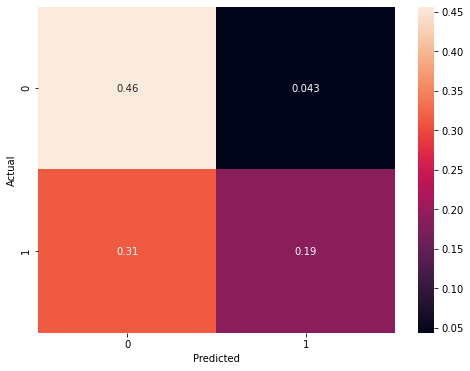

In [175]:
# get actual and create heatmap 
actual_ngram = test_Y_ngram
predictions_lasso_ngram = predicted_test_lasso
confusion_matrix_ngram_lasso = pd.crosstab(actual_ngram, predictions_lasso_ngram, rownames=['Actual'], colnames=['Predicted'], normalize=True)
plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix_ngram_lasso, annot=True)

## Algorithm Comparison and Analysis

According to the above results, compare the performances of naive Bayes, logistic regression, naive Bayes with 2-grams, and logistic regression
with 2-grams. Which method performs best in the prediction task and why? What do you
learn about the language that people use in online reviews (e.g., expressions that will make
the posts positive/negative)? Hint: Inspect the weights learned from logistic regression.

### Answer

In general - part (1) is better than part (2).

In n-gram model:
    lasso accuracy < ridge accuracy because Lasso penalizes for many features.